In [1]:
#import all libraries
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import re

In [3]:
# import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MultiLabelBinarizer

In [4]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [5]:
import wordcloud
from wordcloud import WordCloud

In [6]:
pip install nltk

In [7]:
#Removal of stopwords
#import library
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gyanp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gyanp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\gyanp\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [8]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk import pos_tag
from nltk.stem import PorterStemmer, SnowballStemmer

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB,BernoulliNB
from sklearn import metrics
from sklearn.metrics import f1_score,precision_score,recall_score,accuracy_score,classification_report,silhouette_score


In [10]:
from datetime import datetime

In [11]:
#read dataset
df_original = pd.read_csv("C:\Desktop\DataScience _Scalar\portfolio\Train\Train.csv")

In [12]:
#snippet of dataset
df_original.head()

,Id,Title,Body,Tags
0,1,How to check if an uploaded file is an image w...,<p>I'd like to check if an uploaded file is an...,php image-processing file-upload upload mime-t...
1,2,How can I prevent firefox from closing when I ...,"<p>In my favorite editor (vim), I regularly us...",firefox
2,3,R Error Invalid type (list) for variable,<p>I am import matlab file and construct a dat...,r matlab machine-learning
3,4,How do I replace special characters in a URL?,"<p>This is probably very simple, but I simply ...",c# url encoding
4,5,How to modify whois contact details?,<pre><code>function modify(.......)\n{\n $mco...,php api file-get-contents


In [13]:
#records and features of dataset
df_original.shape

#There are 6034195 records with 4 features in dataset

(6034195, 4)

In [14]:
# As the number of records for this dataset is too large.
# Take sample of dataset consisting of 100k entries
df = pd.DataFrame(df_original[0:100000][:])
#df = pd.read_csv("C:\Desktop\DataScience _Scalar\portfolio\Train\Train_1.csv")

In [15]:
#shape of sample dataset
df.shape

#Now, there are 100000 rows and 4 features in sample dataset

(100000, 4)

In [16]:
#basic information about sample dataset
df.info()

#dataset having four features.
# Id is the primary key representing the identity of questions asked on forum. The datatype is "int64".
# Title is the heading of the question. The datatype is "object".
# Body is the detail part of the question. The datatype is "object".
# Tags is the keyword provided to the record based on content of Title and Body. The datatype is "object".

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Id      100000 non-null  int64 
 1   Title   100000 non-null  object
 2   Body    100000 non-null  object
 3   Tags    100000 non-null  object
dtypes: int64(1), object(3)
memory usage: 3.1+ MB


In [17]:
#snippet of sample dataset
df.head()

,Id,Title,Body,Tags
0,1,How to check if an uploaded file is an image w...,<p>I'd like to check if an uploaded file is an...,php image-processing file-upload upload mime-t...
1,2,How can I prevent firefox from closing when I ...,"<p>In my favorite editor (vim), I regularly us...",firefox
2,3,R Error Invalid type (list) for variable,<p>I am import matlab file and construct a dat...,r matlab machine-learning
3,4,How do I replace special characters in a URL?,"<p>This is probably very simple, but I simply ...",c# url encoding
4,5,How to modify whois contact details?,<pre><code>function modify(.......)\n{\n $mco...,php api file-get-contents


In [18]:
#make csv of sample dataset to system 
df.to_csv('C:\Desktop\DataScience _Scalar\portfolio\Train\Train_1.csv', index=True, header=True)

# **Data preprocessing**

##  Data duplicates

In [19]:
#check duplicates
df.duplicated().sum()

# There are no duplicates in the dataset. Each entry is unique.

0

In [20]:
#checking duplicates in "Title", "Body" and "Tag" features
df.duplicated(subset = ['Title','Body', "Tags"]).sum()

# On checking the duplicacy for features 'Title','Body' and 'Tags', there are 564 records having
# same Title, Body and Tags with different Id.
# Our goal is basically dependent on Title and Body features. Id feature is not relevant.
# 564 out of 100000 makes 0.56%, which is too low.
# Therefore, it will be appropriate to delete those records.

564

In [21]:
#delete duplicate entries for features Title, Body and Tags
df = df.drop_duplicates(subset = ['Title','Body', "Tags"])

In [22]:
#check shape of dataset
df.shape

#Final dataset has 99436 records with 4 features

(99436, 4)

##  Analysis and pre-processing of Feature "Tags"

In [23]:
# Add feature "count of tags" which counts the number of tags associated with each entry/record/question asked
df["count_tags"] = df["Tags"].apply(lambda x: len(list(x.split())))
df.head()

,Id,Title,Body,Tags,count_tags
0,1,How to check if an uploaded file is an image w...,<p>I'd like to check if an uploaded file is an...,php image-processing file-upload upload mime-t...,5
1,2,How can I prevent firefox from closing when I ...,"<p>In my favorite editor (vim), I regularly us...",firefox,1
2,3,R Error Invalid type (list) for variable,<p>I am import matlab file and construct a dat...,r matlab machine-learning,3
3,4,How do I replace special characters in a URL?,"<p>This is probably very simple, but I simply ...",c# url encoding,3
4,5,How to modify whois contact details?,<pre><code>function modify(.......)\n{\n $mco...,php api file-get-contents,3


In [24]:
# find the maximum number of tags associated with question asked
max(df['count_tags'])

# The maximum number of tags pinned with question is 5

5

In [25]:
# find the minimum number of tags associated with question asked
min(df['count_tags'])

# The minimum number of tags pinned with question is 1

1

In [26]:
# count the number of questions having tags from 1 to 5.
df["count_tags"].value_counts()

# Maximum number of questions have 3 pinned tags. Count of those questions is 28603
# 26384 questions have 2 tags pinned with it
# 19009 questions have 4 tags associated with it
# 13784 questions have 1 tag pinned with it
# 11656 questions have 5 tags associated with it

3    28603
2    26384
4    19009
1    13784
5    11656
Name: count_tags, dtype: int64

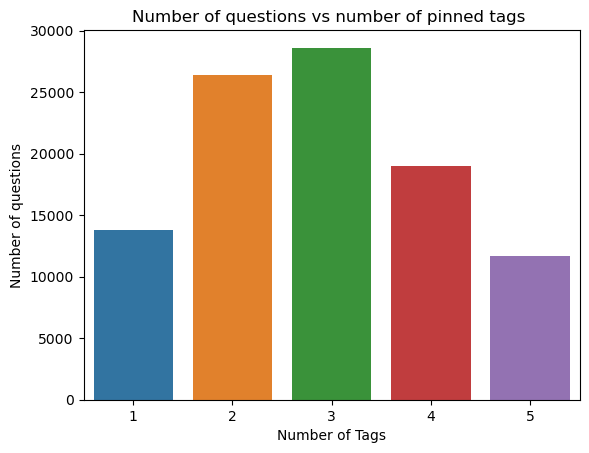

In [27]:
# plot graph for count of number of questions having tags from 1 to 5 for better visualization
sns.countplot(df["count_tags"])
plt.title("Number of questions vs number of pinned tags ")
plt.xlabel("Number of Tags")
plt.ylabel("Number of questions")
plt.show()

In [28]:
# Extract the tags in dataset using CountVectorizer
# initialize
count_vector = CountVectorizer(tokenizer = lambda x: x.split())
#fit the feature "Tags" of dataset
tag = count_vector.fit_transform(df['Tags'])

In [29]:
# extract information of tag
tag.shape

# There are total 99436 documents and 18448 unique tags appeared atleast once

(99436, 18448)

In [30]:
#extract the names of all tags
#get_feature_names() provide list of all tags
#get_feature_names_out() provide numpy array of all tags
tag_names = count_vector.get_feature_names_out()
tag_names[:10]

array(['.a', '.bash-profile', '.class-file', '.each', '.emf', '.hgtags',
       '.htaccess', '.htpasswd', '.mov', '.net'], dtype=object)

In [31]:
# calculate count/frequency of occurence of each tag
tag_counts = tag.sum(axis=0)
tag_counts = np.ravel(tag_counts)
tag_counts

# The output is numpy array.
# need to zip the tag_names and tag_counts and form a dictionary 

array([ 2,  1,  1, ..., 12,  1,  1], dtype=int64)

In [32]:
# Frame of dictionary of tag names and their frequency of occurence
tag_count_1 = dict(zip(tag_names,tag_counts))
tag_count = tag_count_1.items()
tag_count

# The result is not readable. 
# Convert them into dataframe.

dict_items([('.a', 2), ('.bash-profile', 1), ('.class-file', 1), ('.each', 6), ('.emf', 2), ('.hgtags', 2), ('.htaccess', 331), ('.htpasswd', 1), ('.mov', 1), ('.net', 2668), ('.net-1.1', 3), ('.net-2.0', 31), ('.net-3.5', 84), ('.net-4.0', 125), ('.net-4.5', 17), ('.net-assembly', 22), ('.net-cf-3.5', 1), ('.net-framework', 5), ('.net-install', 1), ('.net-micro-framework', 2), ('.net-remoting', 4), ('.net-security', 1), ('.net2.0', 1), ('.net3.5', 1), ('.net4.0', 2), ('.nettiers', 2), ('.obj', 1), ('.post', 4), ('.rdlc', 1), ('.refresh', 1), ('.sdf', 1), ('.war', 1), ('.wav', 1), ('.x', 2), ('1080p', 2), ('10gbethernet', 2), ('10gige', 1), ('16bit', 2), ('1and1', 2), ('2-legged', 1), ('2-tier', 1), ('2003', 2), ('2007', 71), ('2010', 106), ('2013', 13), ('24bit', 1), ('24hour', 1), ('2d', 35), ('2d-array', 9), ('2d-games', 1), ('2wire', 2), ('3-tier', 3), ('3.0', 14), ('3.0.1', 1), ('3.1', 1), ('301', 2), ('301-redirect', 1), ('32-bit', 13), ('32-vs-64-bit', 1), ('3270', 1), ('32bit',

In [33]:
len(tag_count)

18448

In [34]:
# create a dataframe of tags and its count
tag_count_df = pd.DataFrame(tag_count,columns = ["Tags","Count of tags"])
tag_count_df.head()

# There are total 18448 unique tags appeared in dataset.

,Tags,Count of tags
0,.a,2
1,.bash-profile,1
2,.class-file,1
3,.each,6
4,.emf,2


In [35]:
# sort the above to get names of tags appeared mostly.
tag_count_df_sorted = tag_count_df.sort_values(['Count of tags'], ascending=False)
tag_count_df_sorted.head()

#Top 5 tags are c# appeared 7745 times, followed by java which appeared 6753 times, then php appeared 
# 6545 times, followed by javascript which appeared 6102 times and android appeared 5287 times

,Tags,Count of tags
2010,c#,7745
8044,java,6753
11936,php,6545
8086,javascript,6102
569,android,5287


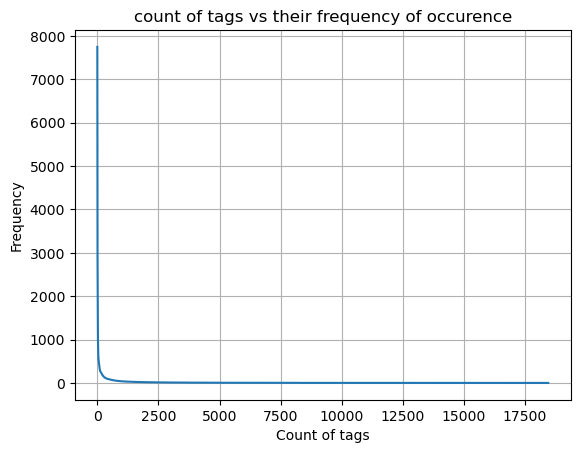

In [36]:
#plot graphs 
plt.plot(tag_count_df_sorted['Count of tags'].values)
plt.grid()
plt.title("count of tags vs their frequency of occurence")
plt.xlabel("Count of tags")
plt.ylabel("Frequency")
plt.show()

# The plot is not conveying any relevant information as the number of tags are very large.
# Take small dataset to visualize properly

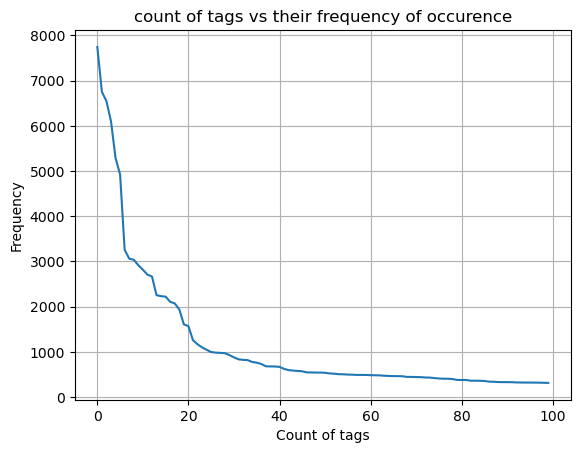

In [37]:
#plot graphs 
plt.plot(tag_count_df_sorted['Count of tags'][:100].values)
plt.grid()
plt.title("count of tags vs their frequency of occurence")
plt.xlabel("Count of tags")
plt.ylabel("Frequency")
plt.show()

In [38]:
# Plot graph for top 30 tags for better visualization
tag_count_df_sorted_top_30 = tag_count_df_sorted[:30]

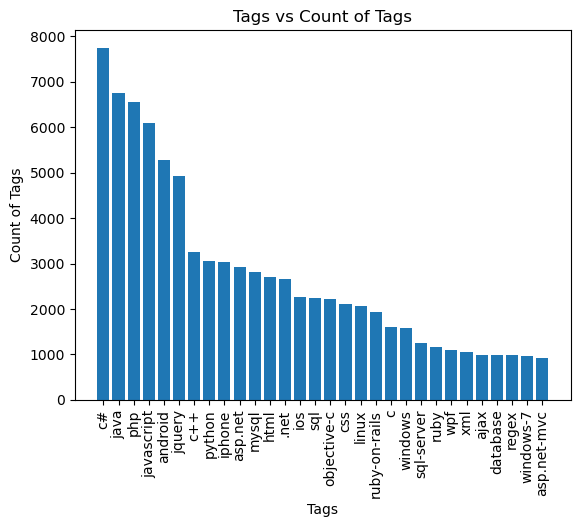

In [39]:
#plot bar plot for tag names and their frequency of occurence
plt.bar(tag_count_df_sorted_top_30["Tags"], tag_count_df_sorted_top_30["Count of tags"])
plt.xlabel("Tags")
plt.ylabel("Count of Tags")
plt.title("Tags vs Count of Tags")
plt.xticks(rotation = 90)
plt.show()

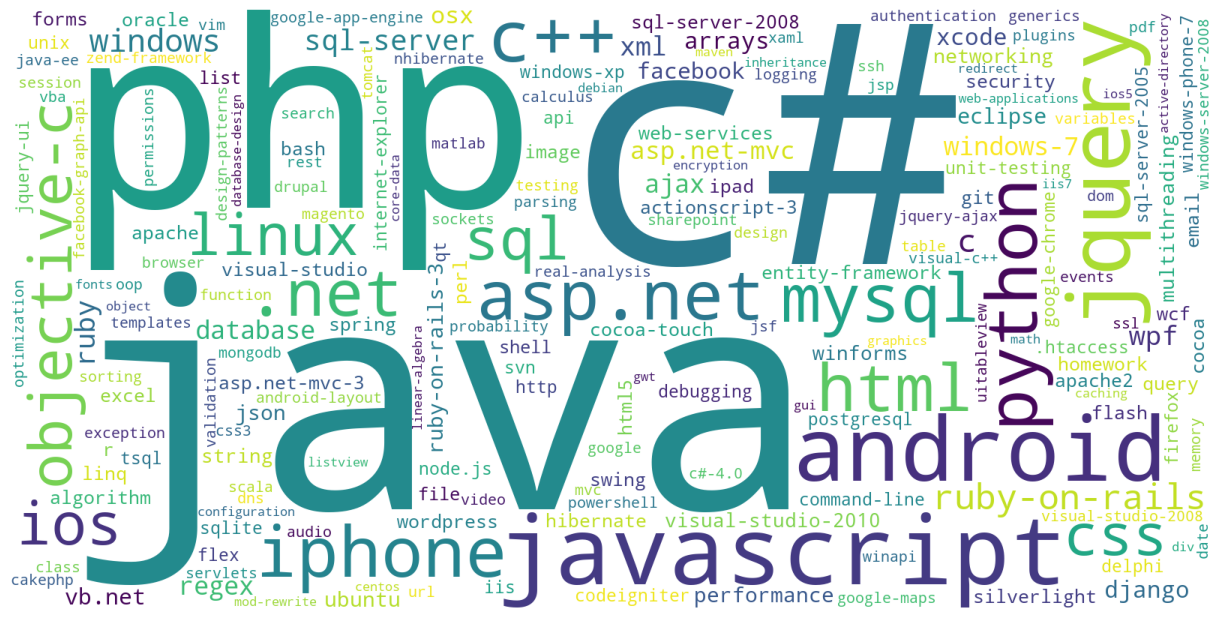

In [40]:
# create word map or word cloud for tags
word_cloud = WordCloud(background_color = 'White',width = 1600,height = 800).generate_from_frequencies(tag_count_1)
plt.figure(figsize = (12,8))
plt.imshow(word_cloud)
plt.axis('off')
plt.tight_layout(pad=0)

# This can be seen from word map that c#, java, php, javascript, 
# android and jquery are the most frequent appeared tags in dataset

#  Analysis and pre-processing of Feature "Title" and "Body"

In [41]:
#Combine text of "Title" and "Body" and name it as "text"
df["text"] = df["Title"]+" "+df["Body"]

In [42]:
df.head(2)

,Id,Title,Body,Tags,count_tags,text
0,1,How to check if an uploaded file is an image w...,<p>I'd like to check if an uploaded file is an...,php image-processing file-upload upload mime-t...,5,How to check if an uploaded file is an image w...
1,2,How can I prevent firefox from closing when I ...,"<p>In my favorite editor (vim), I regularly us...",firefox,1,How can I prevent firefox from closing when I ...


In [43]:
df["len_before_preprocess"] = df["text"].apply(lambda x: len(x.split(" ")))

In [44]:
df.head(2)

,Id,Title,Body,Tags,count_tags,text,len_before_preprocess
0,1,How to check if an uploaded file is an image w...,<p>I'd like to check if an uploaded file is an...,php image-processing file-upload upload mime-t...,5,How to check if an uploaded file is an image w...,87
1,2,How can I prevent firefox from closing when I ...,"<p>In my favorite editor (vim), I regularly us...",firefox,1,How can I prevent firefox from closing when I ...,74


In [45]:
# statistical analysis on "length before preprocessing"
print(df['len_before_preprocess'].max())
print(df['len_before_preprocess'].min())
print(df['len_before_preprocess'].mean())

17443
7
192.79000563176314


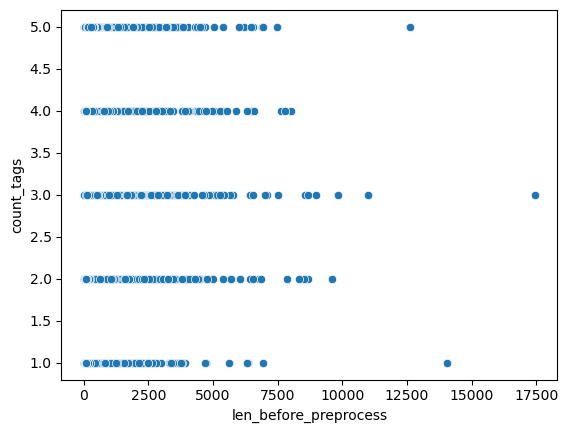

In [46]:
# determine outliers
sns.scatterplot(x= df['len_before_preprocess'], y = df['count_tags'])
plt.show()

# there are many outliers.
# need to clean the text feature

In [47]:
# Analysis on outliers of dataset
Q1_count = np.percentile(df['len_before_preprocess'], 25,interpolation = 'midpoint')
Q3_count = np.percentile(df['len_before_preprocess'], 75,interpolation = 'midpoint')
IQR_count = Q3_count - Q1_count
upper_count=Q3_count+1.5*IQR_count
lower_count=Q1_count-1.5*IQR_count
if lower_count < 0:
 lower_count =0
print("Upper Bound_count:",upper_count)
print("Lower Bound_count:",lower_count)
print("outliers above upper bound in 'len_before_preprocess' field is:",
 len(df[df['len_before_preprocess']>=upper_count]))
print("outliers below lower bound in 'len_before_preprocess' field is:",
 len(df[df['len_before_preprocess']<=lower_count]))

Upper Bound_count: 399.5
Lower Bound_count: 0
outliers above upper bound in 'len_before_preprocess' field is: 8986
outliers below lower bound in 'len_before_preprocess' field is: 0


In [48]:
df[df['len_before_preprocess']>=upper_count][["text",
            "len_before_preprocess"]].sort_values(["len_before_preprocess"], ascending = False).head(2)

,text,len_before_preprocess
5844,Solr admin interface analysis results and solr...,17443
62291,Two OnTouchListener Conflicting <p>I am creati...,14035


## text analysis 

In [49]:
#check for code existing in text
df['is_code'] = df['text'].apply(lambda x : 1 if '<code>' in x else 0)
df['is_code'].value_counts()

1    55755
0    43681
Name: is_code, dtype: int64

In [50]:
#find percentage of text having code in it
print("percentage of questions including code is: ", (len(df[df['is_code']==1])/len(df))*100)

percentage of questions including code is:  56.07124180377328


## cleaning of text

1. Remove all code part from text.
2. Remove all html syntaces from text.
3. Remove all non-alpha characters from text.
4. Remove all verbs, conjunctions and prepositions from text, which are not relevant.
5. Remove all inbuilt stopwords from text.
6. Do stemming or Deduce or convert all words into their root form.
7. Make a list of all irrelvant stopwords and Remove them from the text.
8. we will get cleaner text.
9. Now, calculate the length of text after pre-processing.

In [51]:
 # function to delete code, html syntaces, non-alpha characters from text
def process(data):
    # removing code part
    data1 = re.sub('<code>(.*?)</code>', '', str(data), flags=re.MULTILINE|re.DOTALL)
    #removing html syntax
    data2 = re.sub(re.compile('<.*?>'),' ',str(data1))
    #removing non-alpha characters
    data3 = re.sub(r'[^A-Za-z]+',' ',str(data2))
    return data3

In [52]:
#function to remove all verbs, prepositions and conjunctions
def pos_tag_removal(data):
    filtered = []
    pos_tags = nltk.pos_tag(data.split())
    for word, tag in pos_tags:
        if tag != 'VB' or tag != 'IN' or tag != "CC":
            filtered.append(word)
    return filtered

In [53]:
#function to remove stopwords
# text feature filtered with stopwords
# initialize
stopwords = stopwords.words('english')
def stopwords_removal(data):
    filtered_1 = []
    for word in data.split():
        if word not in stopwords:
            filtered_1.append(word)
    return filtered_1

In [54]:
#apply the process function on text column
df["text"] = df["text"].apply(process)

In [55]:
#apply the pos_tag_removal function on text column 

df['text'] = df['text'].apply(pos_tag_removal)
df['text'] = df['text'].apply(lambda x :' '.join(x) )

In [56]:
#apply the stopwords_removal function on text column

df['text'] = df['text'].apply(stopwords_removal).apply(lambda x :' '.join(x))

In [57]:
# function for stemming
# function to deduce words into their stem words or convert words into their root form
# here we are using Snowball Stemmer
stemmer = SnowballStemmer("english")
def process_1(data):
    words = word_tokenize(str(data.lower()))
    ques_list = []
    for j in words:
        ques = ''
        if (len(j)!=1 or j == 'c'):
            ques = ''.join(str(stemmer.stem(j)))
            ques_list.append(ques)
    return ques_list

In [58]:
# apply process_1 function on text

df['text'] = df['text'].apply(process_1).apply(lambda x :' '.join(x) )

In [59]:
# MAke list of all irrelevant stemwords
custom_stem_words = ["How", "I", "Is","I'd", "I'm","I've","need", "use", "using", "So", "Have","want", "got",
                     "trying", "able", "recently", "making", "i'm", "This", "What", "In", "like","have",
                     "creat", "respond" " clear", "open", "new", "how", "make", "work", "thank", "while",
                      "in","caus", "includ", "lot", "still", "advance", "peopl", "usual", "might", "prevent",
                     "found", "see","or", "problem", "write", "edit", "help", "could", "look", "consid",
                     "here","that", "use", "as","within", "next", "last", "first", "can", "get", "belong",
                      "thi", "do", "is", "convert", "never", "valu", "simpl", "may", "from", "what", "download",
                     "show", "remov", "insert", "search", "type", "question", "code", "fail", "way", "function",
                     "read", "write", "rotat", "about", "without", "effect", "understand", "document", "design",
                    "select", "pupos", "stop", "open","front", "size", "file", "obtain", "come", "replac", "put",
                     "highlight", "start", "learn", "whether", "specif", "on", "through", "at", "method", "find",
                     "need", "if", "success","singl", "given", "basic", "send", "long", "run", "follow", "my", 
                     "need", "suggest", "end", "ve", "done", "befor", "know", "would", "return", "latest", "been",
                     "best", "current", "accept", "view", "so", "call", "cant", "free", "share", "whi", "where",
                     "turn","cancel", "updat", "one", "anoth", "met", "somebodi", "safe", "possibl", "across",
                     "seem", "doe", "anyon", "everi", "item", "exampl", "ring", "set", "ideal","ani","idea", 
                     "error","messag", "let", "say","greatli", "appreci", "ani", "also", "tri", "give", "miss", 
                     "someth","even", "though", "like", "when", "unit", "test", "everyth", "fine", "we", "re",
                     "much", "the", "wrong", "it", "fix","els","of", "cours", "right", "direct", "pleas",
                     "tell", "left", "two", "differ", "they", "let", "someon","similar", "occur","also", "me",
                     "thing", "enter", "now", "click", "result", "user","control", "text", "page", "instanc",
                     "for", "noth", "happen", "lang", "figur", "out", "reason", "take", "time","go", "back",
                     "id", "background", "imag", "not", "sure", "submit", "form", "frac", "button", "tabl", 
                     "com", "event", "request", "mani", "copi", "past", "alreadi", "exist", "name", "It",
                     "log", "second", "home", "en", "us", "field", "box", "dialog", "multipl", "connect",
                     "press", "rd", "parti", "load", "solv", "issu", "retriev","up", "th", "width", "height",
                     "littl", "bit", "upload", "pretti", "sure", "play", "around", "check", "profil", "hello",
                     "world", "applic", "nbsp","hi", "decid", "nat", "sort", "preview", "tab", "correct", "case",
                     "suit", "live", "keep", "knowledg","ie", "young", "told","screen", "by", "greater",
                     "charact", "must", "defin", "away", "and", "onli", "tutori", "mean", "chang", "offer",
                     "order", "nbsp", "favorit", "close", "import", "invalid", "modifi", "whoi", "detail",
                     "overwrit", "build", "construct", "close", "special", "want", "option", "well", "contain",
                     "colleg", "project", "are", "number" ]

In [60]:
#function to remove custom stem stopwords
def stem_stopwords_removal(data):
    filtered_1 = []
    for word in data.split():
        if word not in custom_stem_words:
            filtered_1.append(word)
    return filtered_1

In [61]:
# Apply function stem_stopwords_removal on text

df['text'] = df['text'].apply(stem_stopwords_removal).apply(lambda x :' '.join(x) )

     Now, we get the cleaner text. Check or length of text after pre-processing of text.

In [62]:
# Now calculate length of text after preprocessing
df["len_after_preprocess"] = df["text"].apply(lambda x : len(x.split(" ")))

In [63]:
df.head(2)

,Id,Title,Body,Tags,count_tags,text,len_before_preprocess,is_code,len_after_preprocess
0,1,How to check if an uploaded file is an image w...,<p>I'd like to check if an uploaded file is an...,php image-processing file-upload upload mime-t...,5,mime png jpg jpeg gif bmp uploadifi mime octal...,87,0,14
1,2,How can I prevent firefox from closing when I ...,"<p>In my favorite editor (vim), I regularly us...",firefox,1,firefox ctrl editor vim regular ctrl execut ce...,74,0,26


In [64]:
# statistical analysis on "length after preprocessing"
print(df['len_after_preprocess'].max())
print(df['len_after_preprocess'].min())
print(df['len_after_preprocess'].mean())

2651
1
32.67966330101774


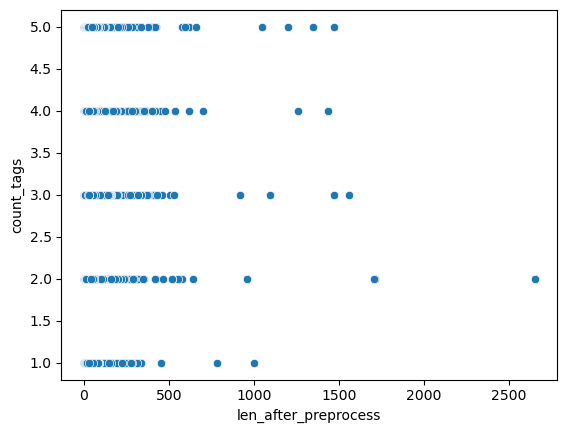

In [65]:
#determine outliers after text processing
sns.scatterplot(x= df['len_after_preprocess'], y = df['count_tags'])
plt.show()

In [66]:
# find out the outliers
Q1_count = np.percentile(df['len_after_preprocess'], 25,interpolation = 'midpoint')
Q3_count = np.percentile(df['len_after_preprocess'], 75,interpolation = 'midpoint')
IQR_count = Q3_count - Q1_count
upper_count=Q3_count+1.5*IQR_count
lower_count=Q1_count-1.5*IQR_count
if lower_count < 0:
 lower_count =0
print(Q1_count, Q3_count)
print("Upper Bound_count:",upper_count)
print("Lower Bound_count:",lower_count)
print("outliers above upper bound in 'len_before_preprocess' field is:",
 len(df[df['len_after_preprocess']>=upper_count]))
print("outliers below lower bound in 'len_before_preprocess' field is:",
 len(df[df['len_after_preprocess']<=lower_count]))

# Earlier outliers are 8986, but now after cleaning of text, the number has been reduced to 5481

16.0 40.0
Upper Bound_count: 76.0
Lower Bound_count: 0
outliers above upper bound in 'len_before_preprocess' field is: 5481
outliers below lower bound in 'len_before_preprocess' field is: 0


In [67]:
df[df['len_after_preprocess']>=upper_count][["text",
            "len_after_preprocess"]].sort_values(["len_after_preprocess"], ascending = False).head(2)

,text,len_after_preprocess
40069,mount dev sda dev sda amazon ec eb volum mount...,2651
75180,web servic conflict among cxf spring jboss web...,1712


In [68]:
display(df.head(2))
print(df.shape)

,Id,Title,Body,Tags,count_tags,text,len_before_preprocess,is_code,len_after_preprocess
0,1,How to check if an uploaded file is an image w...,<p>I'd like to check if an uploaded file is an...,php image-processing file-upload upload mime-t...,5,mime png jpg jpeg gif bmp uploadifi mime octal...,87,0,14
1,2,How can I prevent firefox from closing when I ...,"<p>In my favorite editor (vim), I regularly us...",firefox,1,firefox ctrl editor vim regular ctrl execut ce...,74,0,26


(99436, 9)


    In preparation for future processes, only two features ("text" and "Tags") within our dataset are relevant
    and need to be addressed.

In [69]:
df = df[["text", "Tags"]]
df.shape

# df has 99436 records.

(99436, 2)

As the number of records are too much for processing, consider only those texts which are having top 100 tags.
1. Make a list of top 50 tags.
2. Consider only those records which are having tags which are in top 50 tags

In [70]:
top_tags = tag_count_df_sorted[:100]
list_tags = list(top_tags["Tags"])
list_tags[:10]

['c#',
 'java',
 'php',
 'javascript',
 'android',
 'jquery',
 'c++',
 'python',
 'iphone',
 'asp.net']

In [71]:
escaped_word_list = [re.escape(word) for word in list_tags]
pattern = r'\b(?:' + '|'.join(escaped_word_list) + r')\b'

df = df[df['Tags'].str.contains(pattern, regex = True)]


In [72]:
df.shape

#Now, df has less records.

(78068, 2)

Still records are large in number, so create bigrams for text feature and select only top 100 occuring bigrams

## Generating Bigrams

In [73]:
#function for creating bigrams
def generate_ngrams(text, n_gram=2):
    token = [token for token in text.lower().split(' ') if token != '' ]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [' '.join(ngram) for ngram in ngrams]

In [74]:
# import library for default dict to store all bigrams
from collections import defaultdict
question_bigrams = defaultdict(int)

# create bigrams
for texts in df['text']:
    for word in generate_ngrams(texts, n_gram=2):
        question_bigrams[word] += 1

#calculate length of bigrams
print("length of bigrams:", len(question_bigrams))

length of bigrams: 1168459


In [75]:
#Frame dataframe for bigrams
df_question_bigrams = pd.DataFrame(sorted(question_bigrams.items(), key=lambda x: x[1], reverse = True))
df_question_bigrams = df_question_bigrams.set_axis(['question_bigram', 'count'], axis=1)
# On closely oberving samples of df_question_bigram, the bigram 'c c' does not appropriately pinned with text
# hence, before proceeding consider bigrams excluding 'c c'. 
df_question_bigrams = df_question_bigrams.loc[df_question_bigrams["question_bigram"] != 'c c']
bigram_df = df_question_bigrams[:100]
bigram_df.shape

(100, 2)

In [76]:
# Make a list of top 100 bigrams
top_bigram_list = list(bigram_df["question_bigram"])
# Show top 10 bigrams from top 100 bigrams
top_bigram_list[:10]


['asp net',
 'sql server',
 'visual studio',
 'http www',
 'web servic',
 'command line',
 'net mvc',
 'window server',
 'object c',
 'window xp']

In [77]:
# Create a dictionary to store the highest count bigram for each "text" in df
highest_count_bigrams = {}
for index, row in df.iterrows():
    text = row['text']
    text_bigrams = [bigram for bigram in bigram_df['question_bigram'] if all(word in text for word in bigram.split())]
    
    if text_bigrams:
        highest_count_bigram = max(text_bigrams, key=lambda bigram: bigram_df.loc[bigram_df['question_bigram'] == bigram, 'count'].values[0])
        highest_count_bigrams[index] = highest_count_bigram

# Create a new dataframe with "text," "bigram," and "tag" features
new_df1 = []
for index, bigram in highest_count_bigrams.items():
    text = df.loc[index, 'text']
    tag = df.loc[index, 'Tags']
    new_df1.append({'text': text, 'bigram': bigram, 'Tags': tag})

new_df = pd.DataFrame(new_df1)

In [78]:
# snippet of dataset and its shape
display(new_df.head(2))
print("- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - ")
print(new_df.shape)

# new dataset has now 64572 records. we are good to go with feature engineering.

,text,bigram,Tags
0,mime png jpg jpeg gif bmp uploadifi mime octal...,php php,php image-processing file-upload upload mime-t...
1,firefox ctrl editor vim regular ctrl execut ce...,window window,firefox


- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
(64572, 3)


## Feature Extraction

In [80]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MultiLabelBinarizer

In [81]:
# Assign x and y vector
x = new_df["text"]
y = new_df["Tags"]
print(x.shape)
print(y.shape)

(64572,)
(64572,)


In [82]:
# Convert text data into TF-IDF features
vectorizer = TfidfVectorizer(tokenizer = lambda x: x.split(), binary='true',vocabulary = top_bigram_list, ngram_range = (1,4))
x_1 = vectorizer.fit_transform(x)

# Convert tags into a binary matrix
mlb = MultiLabelBinarizer()
y_1 = mlb.fit_transform(y)

In [84]:
# Split the data into training and test data
x_train, x_test, y_train, y_test = train_test_split(x_1, y_1, test_size = 0.2,random_state = 42)

In [85]:
# Snippet of shapes of train and test data of input and output vectors
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(51657, 100)
(51657, 41)
(12915, 100)
(12915, 41)


# Classification

1. SGD classifier - log and hinge
2. logistic regression
3. naivebayes classifier
4. comparison

In [86]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB,BernoulliNB
from sklearn import metrics
from sklearn.metrics import f1_score,precision_score,recall_score,accuracy_score,classification_report

## OVR Classifier with estimator Logistic Regression

In [87]:

log_reg = OneVsRestClassifier(LogisticRegression(n_jobs=1, C=1e5, solver='liblinear'))
log_reg.fit(x_train, y_train)

OneVsRestClassifier(estimator=LogisticRegression(C=100000.0, n_jobs=1,
                                                 solver='liblinear'))

In [88]:
log_reg_y_pred = log_reg.predict(x_test)

## OVR Classifier with estimator SGD Classifier - log loss

In [89]:

ovr_clf_sgd_log = OneVsRestClassifier(SGDClassifier(loss='log', alpha=0.00001, penalty='l2'))
ovr_clf_sgd_log.fit(x_train, y_train)

OneVsRestClassifier(estimator=SGDClassifier(alpha=1e-05, loss='log'))

In [90]:
ovr_clf_sgd_log_y_pred = ovr_clf_sgd_log.predict(x_test)

## OVR Classifier with estimator SGD Classifier - hinge loss

In [91]:

ovr_clf_sgd_hinge = OneVsRestClassifier(SGDClassifier(loss='hinge', alpha=0.00001, penalty='l2'))
ovr_clf_sgd_hinge.fit(x_train, y_train)

OneVsRestClassifier(estimator=SGDClassifier(alpha=1e-05))

In [92]:
ovr_clf_sgd_hinge_y_pred = ovr_clf_sgd_hinge.predict(x_test)

## OVR Classifier with estimator BernoulliNB

In [93]:

ovr_clf_bnb = OneVsRestClassifier(BernoulliNB())
ovr_clf_bnb.fit(x_train, y_train)

OneVsRestClassifier(estimator=BernoulliNB())

In [94]:
ovr_clf_bnb_y_pred = ovr_clf_bnb.predict(x_test)

# Evaluation Metrics

In [97]:
# function to evaluate metrics for models
def metric(y_test, y_pred):
    print("Accuracy :",       metrics.accuracy_score(y_test,y_pred))
    print("Macro f1 score :", metrics.f1_score(y_test, y_pred, average = 'macro'))
    print("Micro f1 score :",metrics.f1_score(y_test, y_pred, average = 'micro'))
    print("Hamming loss :",   metrics.hamming_loss(y_test,y_pred))

In [98]:
print()
print("\033[1mMetrics for OVR Classifier with estimator Logistic Regression\033[0m")
print()
print(metric(y_test,log_reg_y_pred))
print("--------------------------------------------")
print()
print("\033[1mMetrics for OVR Classifier with estimator SGD Classifier - log loss\033[0m")
print()
print(metric(y_test,ovr_clf_sgd_log_y_pred))
print("--------------------------------------------")
print()
print("\033[1mMetrics for OVR Classifier with estimator SGD Classifier - hinge loss\033[0m")
print()
print(metric(y_test,ovr_clf_sgd_hinge_y_pred))
print("--------------------------------------------")
print()
print("\033[1mMetrics for OVR Classifier with estimator BernoulliNB\033[0m")
print()
print(metric(y_test,ovr_clf_bnb_y_pred))


Metrics for OVR Classifier with estimator Logistic Regression

Accuracy : 0.0005420054200542005
Macro f1 score : 0.35317132179974897
Micro f1 score : 0.6886933617118851
Hamming loss : 0.19998489183498105
None
--------------------------------------------

Metrics for OVR Classifier with estimator SGD Classifier - log loss

Accuracy : 0.00038714672861014324
Macro f1 score : 0.3576744341132049
Micro f1 score : 0.6886485885687377
Hamming loss : 0.2010273552212874
None
--------------------------------------------

Metrics for OVR Classifier with estimator SGD Classifier - hinge loss

Accuracy : 7.742934572202865e-05
Macro f1 score : 0.3477757208902752
Micro f1 score : 0.6881617504565821
Hamming loss : 0.20056844470883733
None
--------------------------------------------

Metrics for OVR Classifier with estimator BernoulliNB

Accuracy : 0.0006968641114982578
Macro f1 score : 0.3645213941403381
Micro f1 score : 0.68732019320158
Hamming loss : 0.20135595781044918
None


# Insights and Conclusion 

**Based on obtained metrics score for four different models using the One-vs-Rest (OvR) classification approach with various estimators, we can draw the following insights and conclusions:**
1. **Logistic Regression and SGD Classifier (log loss)**: These models exhibit similar performance in terms of accuracy and micro F1 score, with micro F1 scores around 0.6887. However, the macro F1 score for these models is relatively low, suggesting that they struggle with classifying all classes equally. The Hamming loss is close to 0.20, indicating room for improvement.
2. **SGD Classifier (hinge loss)**: This model performs slightly worse than the previous two, with the lowest accuracy and micro F1 score. The macro F1 score is also relatively low. The Hamming loss is similar to the other models, indicating difficulty in classifying multiple classes.
3. **BernoulliNB**: This model shows the highest macro F1 score among the four, suggesting better performance in classifying all classes. However, the accuracy, micro F1 score, and Hamming loss are still in the same range as the other models.

**In conclusion, all four models exhibit challenges in accurately classifying multiple classes. The micro F1 scores are decent, but the macro F1 scores suggest uneven performance across classes. The Hamming loss indicates a considerable number of incorrect predictions across labels.**

# Recommendation orAreas for Improvement

**The above models are not the best models. There is lot of space for improvement.**

1. **Hyperparameter Tuning**: Experiment with hyperparameter tuning for each model. Adjust regularization strength, learning rates, or other model-specific parameters to optimize model performance.
2. **Ensemble Methods**: Combine the predictions of multiple models using ensemble methods like stacking or bagging. This can help improve classification performance by leveraging the strengths of each model.
3. **Data Augmentation**: If possible, augment the dataset with more labeled examples, or consider semi-supervised learning techniques to provide the models with additional training data.
4. **Feature Scaling**: Ensure that feature scaling is performed correctly, especially for models like Logistic Regression and SGD, where it can have a significant impact on performance.
5. **Cross-Validation**: Implement cross-validation to get a more robust estimate of model performance. This can help in selecting the best model and avoiding overfitting.

**In summary, these models can be improved through a combination of feature engineering, hyperparameter tuning, and potentially adopting ensemble methods. Continuously evaluating and fine-tuning these models is essential to achieve better multi-class classification results.**

In [ ]:
# Create a CountVectorizer
#count_vectorizer = CountVectorizer(tokenizer = lambda x: x.split(), binary='true',vocabulary = top_50_bigram_list)

# Fit and transform the documents to obtain count vectors
#count_matrix = count_vectorizer.fit_transform(new_df["text"])

# Get the feature names (words or terms)
#count_feature_names = count_vectorizer.get_feature_names_out()

# Create a DataFrame to display the count vectors
#count_df = pd.DataFrame(data=count_matrix.toarray(), columns=count_feature_names)

# Create a TfidfVectorizer
#tfidf_vectorizer = TfidfVectorizer(tokenizer = lambda x: x.split(), binary='true',
#                                   vocabulary = top_bigram_list, ngram_range = (1,4))

# Fit and transform the documents to obtain TF-IDF vectors
#tfidf_matrix = tfidf_vectorizer.fit_transform(new_df["text"])

# Get the feature names (words or terms)
#feature_names = tfidf_vectorizer.get_feature_names_out()

# Create a DataFrame to display the TF-IDF vectors
#tfidf_df = pd.DataFrame(data=tfidf_matrix.toarray(), columns=feature_names)

#print(count_df)
#print(tfidf_df)

#vectorizer = TfidfVectorizer(tokenizer = lambda x: x.split(), binary=True)
#y_multilabel = vectorizer.fit_transform(new_df['Tags'])
#print(y_multilabel.shape)

#count_vectorizer_1 = CountVectorizer(tokenizer = lambda x: x.split(), binary=True)
#y_1 = count_vectorizer_1.fit_transform(y)
#tfidf_vectorizer_1 = TfidfVectorizer(tokenizer = lambda x: x.split(), binary='true',
#                                   vocabulary = top_bigram_list, ngram_range = (1,4))
#x_1 = tfidf_vectorizer_1.fit_transform(x)